### Business Problem:
**Predict Loan Eligibility for Dream Housing Finance company.**<br>

### Business Understanding:
+ **Dream Housing Finance company deals in all kinds of home loans.** 
+ They have presence across all urban, semi urban and rural areas. 
+ Customer first applies for home loan and after that company validates the customer eligibility for loan.

+ **Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form.**
+ These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. 
+ To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

### Feature details:

1. **Variable:** Description
2. **Loan_ID:**	Unique Loan ID
3. **Gender:** Male/ Female
4. **Married:**	Applicant married (Y/N)
5. **Dependents:** Number of dependents
6. **Education:** Applicant Education (Graduate/ Under Graduate)
7. **Self_Employed:** Self employed (Y/N)
8. **ApplicantIncome:**	Applicant income
9. **CoapplicantIncome:** Coapplicant income
10. **LoanAmount:**	Loan amount in thousands
11. **Loan_Amount_Term:** Term of loan in months
12. **Credit_History:**	credit history meets guidelines
13. **Property_Area:** Urban/ Semi Urban/ Rural
14. **Loan_Status:** (Target) Loan approved (Y/N)

<h4><a href = "https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/">Source of the problem</a></h4>

In [137]:
# Including necessary library

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

from imblearn.over_sampling import SMOTE, ADASYN

In [38]:
# Reading dataset from the directory

dataset = pd.read_csv("train.csv")
dataset.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
134,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,Y
357,LP002151,Male,Yes,1,Graduate,No,3875,0.0,67.0,360.0,1.0,Urban,N
49,LP001151,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
577,LP002874,Male,No,0,Graduate,No,3229,2739.0,110.0,360.0,1.0,Urban,Y
418,LP002345,Male,Yes,0,Graduate,No,1025,2773.0,112.0,360.0,1.0,Rural,Y


### 1. Dataset basic understanding

In [39]:
# Number of records and features

dataset.shape

(614, 13)

In [40]:
# Information about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Insights:
+ **Loan_ID is unique key feature** because it has 614 non null values.
+ Dataset has **missing infromation** in **Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History features**.
+ Money related features are maintained in numerical datatypes.

In [41]:
# Describing numerical features

dataset.describe(percentiles=[.25,.5,.75,.95])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
95%,14583.000000,4997.400000,297.800000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Insights
+ ApplicantIncome, CoapplicantIncome & LoanAmount features are right skewed.
+ Loan_Amount_Term mode value will be 360 because 25%, 50%, 75% & 95% percentile value is same.
+ Credit_History is a categorical variable, values [0, 1]

In [42]:
# Describing category feature

dataset.describe(include=np.object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002054,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


#### Insights:
+ **The dataset might be imbalanced** because, in target feature Loan_Status "Y"(Yes) value is majority.

In [43]:
# Missing values in percentage

round(dataset.isnull().sum() / len(dataset) * 100 , 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [44]:
# Checking class wise balancing in target feature

dataset.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#### Insights:
+ The dataset is imbalanced.
+ There are 422 positive class (majority) & 192 negative class(minority).

### 2. EDA

In [45]:
# Create the new dataset without missing values to perform EDA

df1 = dataset.copy(deep=True)

# Removing the null values datapoints
df1.dropna( how="any", axis="index", inplace=True )

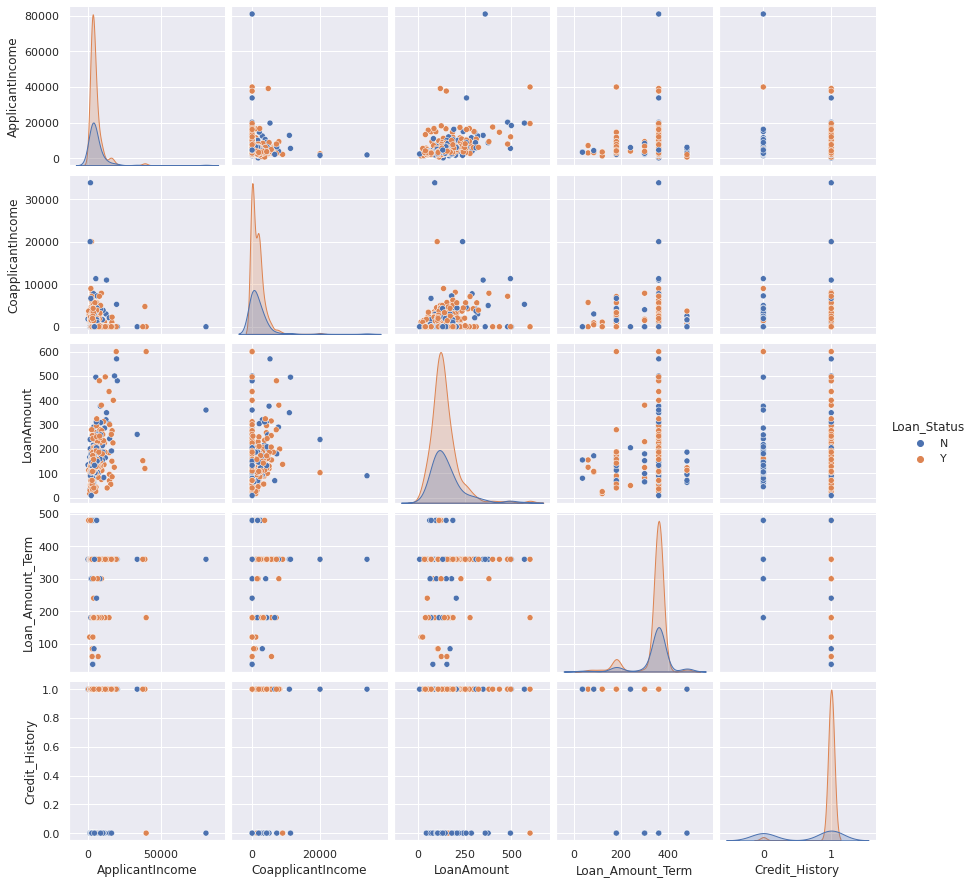

In [46]:
# Pair plots for numerical features with respect to target class

sns.pairplot(df1, hue="Loan_Status")
plt.show()

#### Insights:
+ There is a **linear relationship** exist between **LoanAmount and ApplicantIncome** as well as **LoanAmount and CoapplicantIncome**. The relationship is not significant.
+ **Credit_History play important role for Loan approval process**. If the Credit_History value is 1 then probability of getting loan approval will be high.
+ Majority of the loan application proposed for 360 months of tenure.

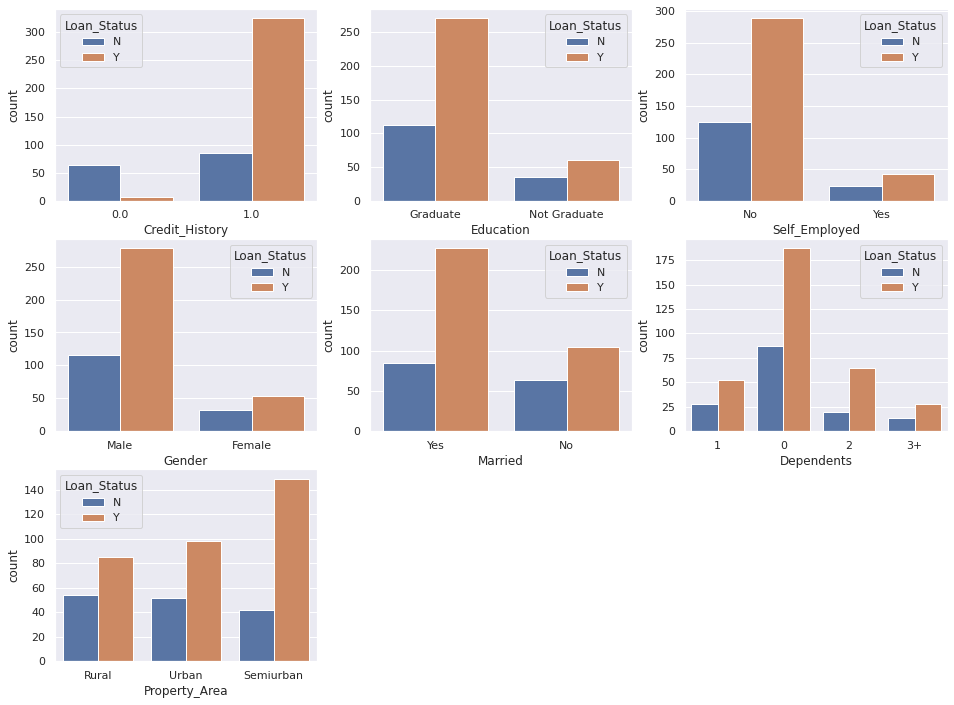

In [47]:
# Exploring the credit history feature

fig = plt.figure(figsize=(16,12))
sns.set_theme(style="darkgrid")

col_list = ["Credit_History", "Education", "Self_Employed", "Gender", "Married", "Dependents", "Property_Area"]
plot_count = 331

for col in col_list:
    plt.subplot(plot_count)
    sns.countplot( x=df1[col], hue=df1.Loan_Status)
    plot_count = plot_count + 1

plt.show()

#### Insights:
+ Only **Credit_History is more significant with Loan approval. Other features are not much corelated**.
+ **Mostly Graduate & non-Self employed are applying for loan.**
+ **Most of the loan applications are from Male and married too.**
+ **Loan sanction probability for applicant without dependents is more.**
+ Number of loan application from **Rural & Urban is more or less same. The possibility of loan application acceptance from Semiurban is more.**

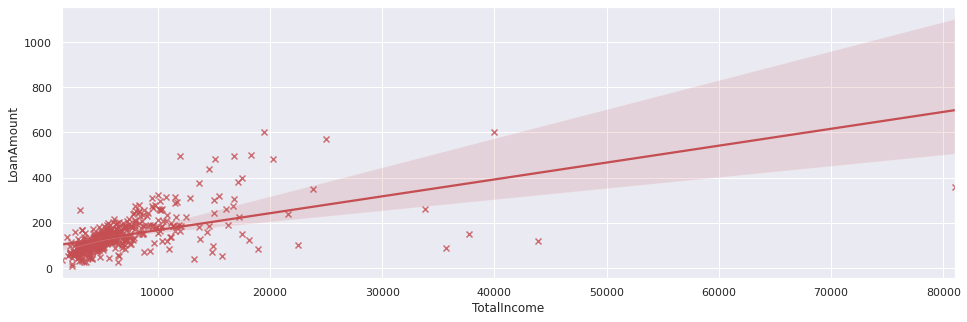

In [48]:
# Exploring Loan amount VS Total income (Applicant income + Coapplicant income)

df1["TotalIncome"] = df1["ApplicantIncome"] + df1["CoapplicantIncome"]

plt.figure(figsize=(16,5))
sns.regplot(x=df1.TotalIncome, y=df1.LoanAmount, marker='x', color='r')
plt.show()

#### Insights:
+ **Total income (applicant income + coapplicant income) and Loan amount follows Linear relationship.**
+ **But this relationship is not much significant.**

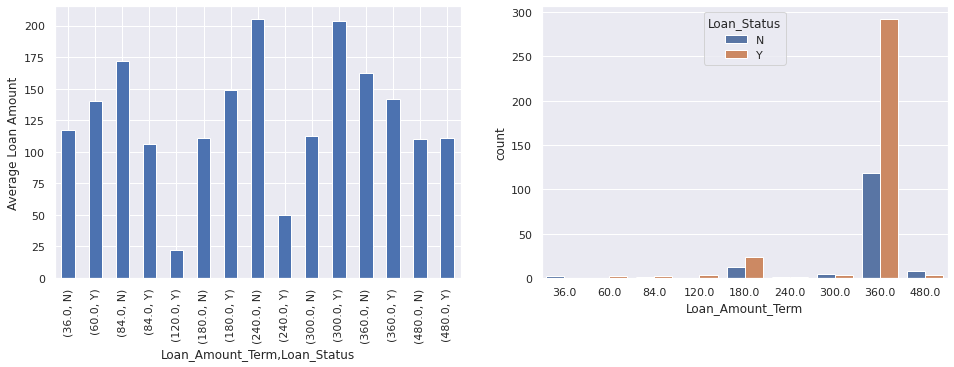

In [49]:
# Exploring Loan amount VS Loan_Amount_Term 

plt.figure(figsize=(16,5))
plt.subplot(121)
df1.groupby(["Loan_Amount_Term","Loan_Status"])["LoanAmount"].mean().plot(kind='bar')
plt.ylabel("Average Loan Amount")

plt.subplot(122)
sns.countplot(df1.Loan_Amount_Term, hue=df1.Loan_Status)
plt.show()

#### Insights:
+ **There is no relationship exist between Loan amount and tenure.**
+ Ideally based on loan amout the number of tenure will get increase but we can asure this relationship only when we know EMI or due for each month.

### 3. Feature Engineering

In [50]:
# Create the new dataset to perform feature engineering
df2 = dataset.copy(deep=True)

# Missing values
missing = df2[df2.isnull().any(axis=1)]

# Imputing missing values for each feature
df2.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
# Handling missing values for Gender

# Checking the count for each class
print(df2.Gender.value_counts())

# We can directly replace the most frequent value with missing NaN values
df2.Gender.fillna(df2.Gender.mode()[0], inplace=True)

Male      489
Female    112
Name: Gender, dtype: int64


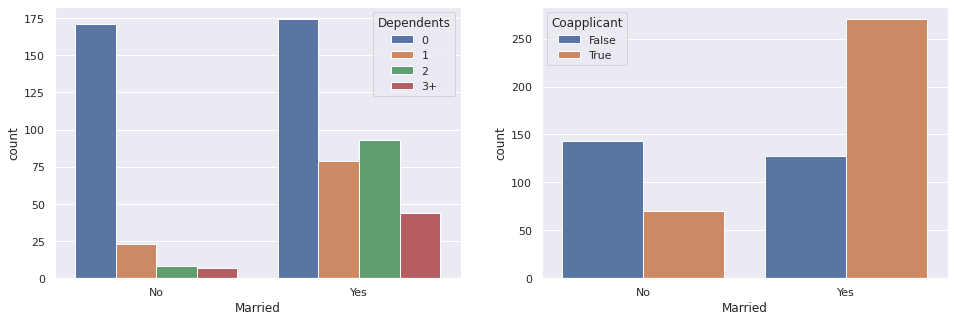

In [52]:
# Handling missing values for Married

df2["Coapplicant"] = df2["CoapplicantIncome"] > 0.0

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.countplot(df2.Married, hue=df2.Dependents )

plt.subplot(122)
sns.countplot(df2.Married, hue=df2.Coapplicant )
plt.show()

#### Insights:
+ There is a relationship between Married & Coapplicant. When coapplicant salary is exist for the observation then probability of the person got married is more.
+ Dependents is not making more sence interms of Married. So we can reimpute the married missing value by validating coapplicant income.

In [53]:
# Imputing the missing values for married feature

# If CoapplicantIncome has some value then replace the missing value with Yes 
df2["Married"][(df2["CoapplicantIncome"] >  0.0)] = df2["Married"][df2["CoapplicantIncome"] >  0.0].fillna(value="Yes")

# Otherwise No
df2["Married"].fillna(value = "No", inplace = True)

In [54]:
# Imputing the missing values for Dependents feature

# The basic understanding about Dependents: If married and coapplicant salary is also present then Dependents > 0 
df2["Dependents"][(df2["Married"] == "Yes") & ( df2["CoapplicantIncome"] > 0.0 )] = \
    df2["Dependents"][(df2["Married"] == "Yes") & ( df2["CoapplicantIncome"] > 0.0 )].fillna("1")

# otherwise 0
df2["Dependents"].fillna(value = "0", inplace = True)

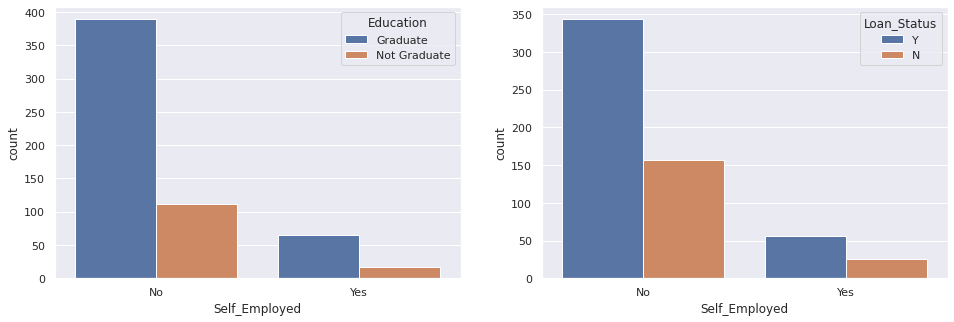

In [55]:
# Exploring the Self employed feature and try to impute the missing values

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.countplot(df2.Self_Employed, hue=df2.Education)

plt.subplot(122)
sns.countplot(df2.Self_Employed, hue=df2.Loan_Status)

plt.show()

#### Insights:
+ Most of the non self employed applicant are graduate and there is a high probability of loan approval. Using this logic we can impute the missing values for self employed feature.

In [56]:
# Imputing the missing values for Self Employed feature

# If Education is Graduate & Loan_Status is Y then Self_Employed will mostly be "No" 
df2["Self_Employed"][(df2["Education"] == "Graduate") & (df2["Loan_Status"] == "Y")] = \
    df2["Self_Employed"][(df2["Education"] == "Graduate") & (df2["Loan_Status"] == "Y")].fillna("No")

# Otherwise "Yes"
df2["Self_Employed"].fillna("Yes", inplace = True)

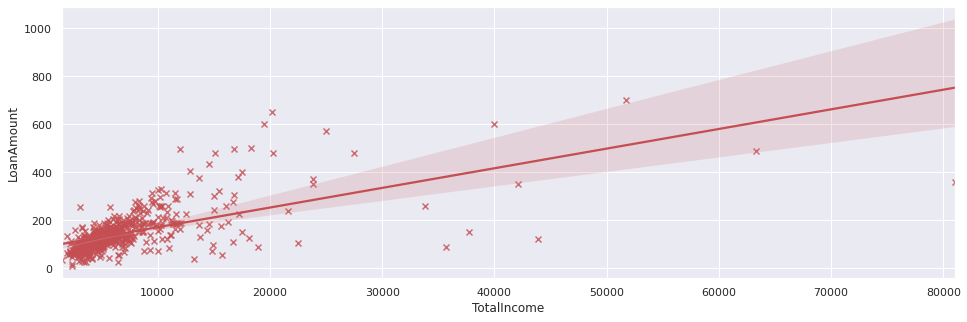

In [57]:
# Imputing the missing value Loan Amount

# Exploring Loan amount VS Total income (Applicant income + Coapplicant income)
df2["TotalIncome"] = df2["ApplicantIncome"] + df2["CoapplicantIncome"]

# We know there is a linear realtionship exist between Loan amount & Total income ( From EDA)
plt.figure(figsize=(16,5))
sns.regplot(x=df2.TotalIncome, y=df2.LoanAmount, marker='x', color='r')
plt.show()

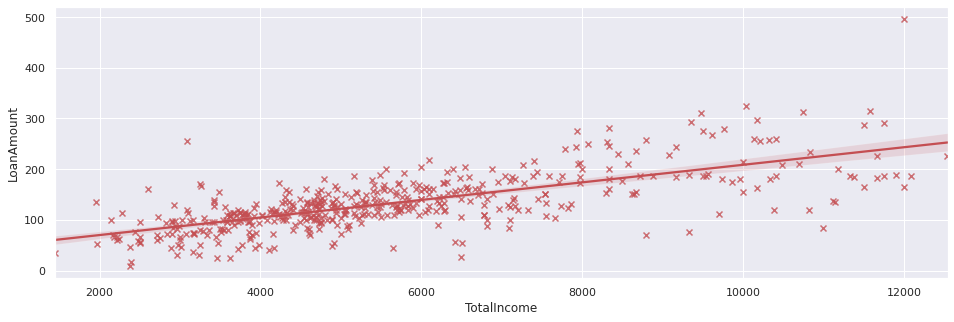

In [58]:
# Replicate the dataset and remove the outliers and missing values

df2["TotalIncome"] = df2["TotalIncome"].round(decimals=2)
model_data = df2.copy(deep=True)
model_data.dropna(how="any", axis="index", inplace = True)

# Removing outliers:
Q1 = model_data.TotalIncome.quantile(.25)
Q3 = model_data.TotalIncome.quantile(.75)
IQR = Q3 - Q1
model_data =  model_data[(model_data.TotalIncome >= (Q1 - 1.5 * IQR)) & (model_data.TotalIncome <= (Q3 + 1.5 * IQR))]

plt.figure(figsize=(16,5))
sns.regplot(x=model_data.TotalIncome, y=model_data.LoanAmount, marker='x', color='r')
plt.show()

In [59]:
# Creating linear regressing model for Total income and Loan amount and predict the missing values

LR_model = LinearRegression()
LR_model.fit(np.array(model_data.TotalIncome).reshape(-1,1), model_data.LoanAmount)

df2.LoanAmount.replace(to_replace = np.nan, value = -99, inplace = True)

df2.LoanAmount = df2.apply(lambda x : 
                           LR_model.predict(np.array(x["TotalIncome"]).reshape(-1,1))[0]  if x["LoanAmount"] == -99 
                                                                                          else x["LoanAmount"], axis = 1)

In [60]:
# Imputing missing values for Loan_Amount_Term

# As we know there is no relationship exist in Loan_Amount_Term from EDA, 
# So we can replace the missing values with high frequence value 

# Checking the count for each class
print("Loan_Amount_Term Mode value: ", df2.Loan_Amount_Term.mode()[0])
print(df2.Loan_Amount_Term.value_counts())

# We can directly replace the most frequent value with missing NaN values
df2.Loan_Amount_Term.fillna(df2.Loan_Amount_Term.mode()[0], inplace=True)

Loan_Amount_Term Mode value:  360.0
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [61]:
# Imputing missing values for Credit_History feature

#--> If applicant is Graduate and not a Self_Employed then Credit_History is 1.0
df2["Credit_History"][( df2["Education"] == "Graduate") & ( df2["Self_Employed"] == "No" )] = \
    df2["Credit_History"][( df2["Education"] == "Graduate") & ( df2["Self_Employed"] == "No" )].fillna(1.0)
#--> Otherwise
df2["Credit_History"].fillna(value = 0.0, inplace = True)

In [62]:
# Now there is no missing values in dataset

df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Coapplicant          0
TotalIncome          0
dtype: int64

In [63]:
# Remove the Loan_ID feature from the dataset
df2.drop(labels=["Loan_ID"], axis=1, inplace=True)

# Convert the categorical columns into encoded numerical values
for col in df2.columns:
    if df2[col].dtype == np.object:
        df2[col] = df2[col].astype("category")
        df2[col] = df2[col].cat.codes
        df2[col] = df2[col].astype("int")
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant,TotalIncome
0,1,0,0,0,0,5849,0.0,136.49983,360.0,1.0,2,1,False,5849.0
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0,True,6091.0
2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1,False,3000.0
3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1,True,4941.0
4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1,False,6000.0


In [64]:
# Since the dataset is imbalanced, we have to perform the oversampling using SMOTE
# Reference: https://imbalanced-learn.org/stable/over_sampling.html

# Preparing the data
X = df2.drop("Loan_Status", axis="columns")
y = df2.Loan_Status

# Oversampling
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

# Combine the resample data into dataset
df2 = pd.concat([X_resampled, y_resampled], axis="columns")
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Coapplicant,TotalIncome,Loan_Status
0,1,0,0,0,0,5849,0.0,136.49983,360.0,1.0,2,False,5849.0,1
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,True,6091.0,0
2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,False,3000.0,1
3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,True,4941.0,1
4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,False,6000.0,1


### 4. Feature selection:

In [65]:
# Replicate the dataset before doing feature selection

df3 = df2.copy(deep=True)
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Coapplicant,TotalIncome,Loan_Status
0,1,0,0,0,0,5849,0.0,136.49983,360.0,1.0,2,False,5849.0,1
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,True,6091.0,0
2,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,False,3000.0,1
3,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,True,4941.0,1
4,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,False,6000.0,1


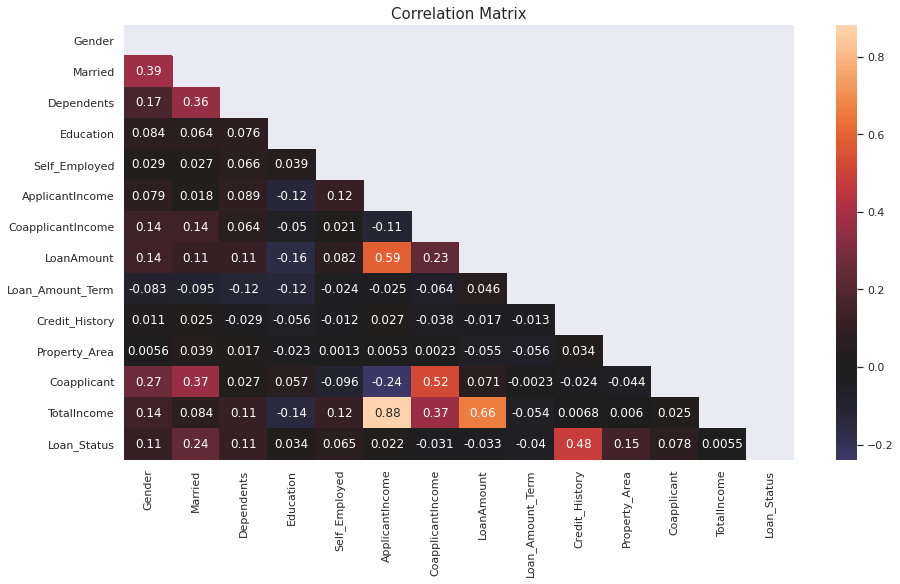

In [66]:
# Heatmap plotting

fig, ax = plt.subplots(figsize = (15,8))
mask = np.triu(df3.corr())

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df3.corr(), annot = True,  center= 0, mask=mask)
ax.set_title("Correlation Matrix", size = 15)
plt.show()

### 5. Model building

In [140]:
# Data preparation
X = df3.drop("Loan_Status", axis="columns")
y = df3.Loan_Status

# Decision tree 
tree_clf = DecisionTreeClassifier()
result_cv = cross_val_score(tree_clf, X, y, cv = 10)
print("Average accuracy of the model using Decision Tree: ", result_cv.mean())

# Randomforest 
RF_clf = RandomForestClassifier(random_state=0)
result_cv = cross_val_score(RF_clf, X, y, cv = 10)
print("Average accuracy of the model using Randomforest: ", result_cv.mean())

# SVM
SVM_clf = SVC()
result_cv = cross_val_score(SVM_clf, X, y, cv = 10)
print("Average accuracy of the model using SVM: ", result_cv.mean())

# XGBoost
XGB_clf = GradientBoostingClassifier()
result_cv = cross_val_score(XGB_clf, X, y, cv = 10)
print("Average accuracy of the model using XGBoosting: ", result_cv.mean())

Average accuracy of the model using Decision Tree:  0.76687675070028
Average accuracy of the model using Randomforest:  0.8343837535014005
Average accuracy of the model using SVM:  0.5260644257703081
Average accuracy of the model using XGBoosting:  0.8131372549019608


In [83]:
# Hyperparameter tuning

param_grid = {'max_depth': [3, 5, 7, 10, 12, 15],
              'min_samples_split': [2, 5, 7, 10, 12, 15]}
base_estimator = RandomForestClassifier(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=10,
                          factor=2, resource='n_estimators',
                          max_resources=30).fit(X, y)
sh.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=15, n_estimators=16,
                       random_state=0)

In [95]:
# Final model with best hyper parameter found from GridSearchCV

RF_clf = RandomForestClassifier(max_depth=7, min_samples_split=15, n_estimators=16)
RF_clf.fit(X, y)
result_cv = cross_val_score(RF_clf, X, y, cv = 10)
print("Average accuracy of the model: ", result_cv.mean())

Average accuracy of the model:  0.808375350140056


### 6. Prediction on test datapoints:

In [96]:
# Impute the missing values as like as training dataset

def handling_missing_value(data):
    # 1. Handling missing values for Gender feature
    #--> We can directly replace the most frequent value with missing NaN values
    data.Gender.fillna(df2.Gender.mode()[0], inplace=True)
    
    # 2. Handling missing values for Married feature
    #--> Create new feature for Coapplicant
    data["Coapplicant"] = data["CoapplicantIncome"] > 0.0
    #--> If CoapplicantIncome has some value then replace the missing value with Yes 
    data["Married"][(data["CoapplicantIncome"] >  0.0)] = data["Married"][data["CoapplicantIncome"] >  0.0].fillna(value="Yes")
    #--> Otherwise No
    data["Married"].fillna(value = "No", inplace = True)
    
    # 3. Handling missing values for Dependents feature
    #--> The basic understanding about Dependents: If married and coapplicant salary is also present then Dependents > 0 
    data["Dependents"][(data["Married"] == "Yes") & ( data["CoapplicantIncome"] > 0.0 )] = \
        data["Dependents"][(data["Married"] == "Yes") & ( data["CoapplicantIncome"] > 0.0 )].fillna("1")
    #--> otherwise 0
    data["Dependents"].fillna(value = "0", inplace = True)

    # 4. Handling missing values for Self_Employed feature
    #--> If Education is Graduate & Loan_Status is Y then Self_Employed will mostly be "No" 
    data["Self_Employed"][data["Education"] == "Graduate"] = data["Self_Employed"][data["Education"] == "Graduate"].fillna("No")
    #--> Otherwise "Yes"
    data["Self_Employed"].fillna("Yes", inplace = True)
    
    # 5. Handling missing values for LoanAmount feature
    #--> Total income = Applicant income + Coapplicant income
    data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
    data["TotalIncome"] = data["TotalIncome"].round(decimals=2)
    #--> Replace the NaN values with -99 for temporary
    data.LoanAmount.replace(to_replace = np.nan, value = -99, inplace = True)
    #--> Predict the missing loan amount using LR model
    data.LoanAmount = data.apply(lambda x : 
                           LR_model.predict(np.array(x["TotalIncome"]).reshape(-1,1))[0]  if x["LoanAmount"] == -99 
                                                                                          else x["LoanAmount"], axis = 1)
    
    # 5. Handling missing values for Loan_Amount_Term feature
    #--> We can directly replace the most frequent value with missing NaN values
    data.Loan_Amount_Term.fillna(df2.Loan_Amount_Term.mode()[0], inplace=True)
    
    # 6. Handling missing values for Credit_History feature
    #--> If applicant is Graduate and not a Self_Employed then Credit_History is 1.0
    data["Credit_History"][( data["Education"] == "Graduate") & ( data["Self_Employed"] == "No" )] = \
        data["Credit_History"][( data["Education"] == "Graduate") & ( data["Self_Employed"] == "No" )].fillna(1.0)
    #--> Otherwise
    data["Credit_History"].fillna(value = 0.0, inplace = True)
    
    return data
    

In [97]:
# Feature engineering

def feature_engineering(data):
    # 1. Remove the Loan_ID feature from the dataset
    data.drop(labels=["Loan_ID"], axis=1, inplace=True)

    # 2. Convert the categorical columns into encoded numerical values
    for col in data.columns:
        if data[col].dtype == np.object:
            data[col] = data[col].astype("category")
            data[col] = data[col].cat.codes
            data[col] = data[col].astype("int")
    
    return data

In [110]:
# Model prediction

def model_prediction(RF_clf, data):
    # Prediction for test datapoints
    return RF_clf.predict(data)
    
# Preparing the outputfile

def output_file(loan_id, target):
    # Prepare the the output file with only Loan_ID & Loan_Status
    final = pd.DataFrame( { "Loan_ID" : loan_id ,
                            "Loan_Status" : target } )
    
    # Converting the prediction file into CSV
    final.to_csv("prediction.csv", index = False)

In [135]:
# Reading test dataset

test = pd.read_csv("test.csv")
processed = test.copy(deep=True)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [136]:
# Pipline process

# Missing value imputation
processed = handling_missing_value(processed)

# Feature Engineering
processed = feature_engineering(processed)

# Prediction using ML model
prediction = model_prediction(RF_clf, processed)

# Prepare the the output file with only Loan_ID & Loan_Status
loan_id = list(test.Loan_ID)
target = list(prediction)
final = pd.DataFrame( { "Loan_ID" : loan_id , "Loan_Status" : target } )

final.Loan_Status = final.Loan_Status.apply( lambda x : "Y" if x == 1 else "N" )
# Converting the prediction file into CSV
final.to_csv("prediction.csv", index = False)